In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
from utils import *
torch.manual_seed(6)

# Load the spikes and compute FFT and IRH

freqs2 [30 39 48]
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
freqs2 None
loaded isi_s
freqs2 [30 39 48]
acc_te_isi_f1_30_3_54-f2_30_9_48-100-100-1-0_1-0.pt
[0.19142857193946838, 0.2480952392021815, 0.2471428612867991, 0.2790476183096568, 0.26380952696005505, 0.2852381070454915, 0.31809524198373157, 0.2923809587955475, 0.3028571407000224, 0.33619048198064166, 0.3200000027815501, 0.31285715103149414, 0.3095238208770752, 0.3276190559069316, 0.32333333293596905, 0.31761905550956726, 0.32333333293596905, 0.2976190547148387, 0.29952381054560345, 0.3223809599876404, 0.3209523856639862, 0.31333333253860474, 0.36095237731933594, 0.3257142901420593, 0.32333333293596905, 0.32523809870084125, 0.33523809909820557, 0.33142857750256854, 0.3276190559069316, 0.3452380994955699, 0.3323809504508972, 0.35428571701049805, 0.3447619080543518, 0.361428568760554, 0.3519047598044078, 0.3

<BarContainer object of 1 artists>

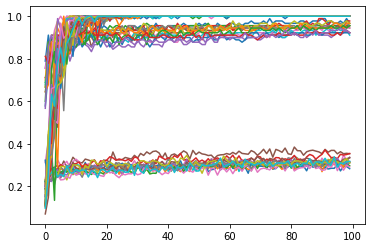

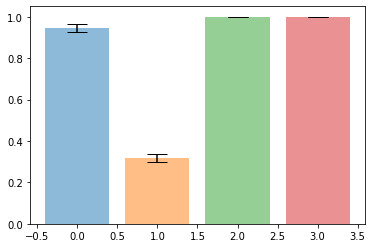

In [3]:
class Dict2Class(object):
      
    def __init__(self, my_dict):
          
        for key in my_dict:
            setattr(self, key, my_dict[key])
parameters = {'seed': 6, 'sim_time': 1, 'trials_n': 100, 'noise': 100, 'shift': 1, 'batch_size': 1000, 'gpu': False, 'epochs': 100, 'lr_spikes': 0.1, 'lr_dec': 1, 'clock_sim': 0.1, 'tau_Osc_Irec': 0.001, 'tau_Osc_Ie': 0.001, 'tau_Osc': 0.01, 'neurons_n': 50, 'enc_w_in_mean': 0, 'enc_w_in_std': 1, 'gain_syn': 1, 'gain_syn_rec': 0.1, 'regen_stimuli': True, 'layers_size': [50, 50], 'nni_opt': False, 'tqdm_silence': False, 'figures': 0, 'load_optimal': False, 'early_stop': False, 'sprinkle': 0, 'f1_start': 30, 'f1_end': 57, 'f1_step': 3, 'f2_start': 30, 'f2_end': 57, 'f2_step': 9}
parameters['device'] = 'cpu'
args = Dict2Class(parameters)
freqs1 = np.arange(args.f1_start, args.f1_end, args.f1_step)
freqs2 = np.arange(args.f2_start, args.f2_end, args.f2_step)
parameters = {'seed': 6, 'sim_time': 1, 'trials_n': 100, 'noise': 100, 'shift': 1, 'batch_size': 1000, 'gpu': False, 'epochs': 100, 'lr_spikes': 0.1, 'lr_dec': 1, 'clock_sim': 1e-3, 'tau_Osc_Irec': 0.001, 'tau_Osc_Ie': 0.001, 'tau_Osc': 0.01, 'neurons_n': 50, 'enc_w_in_mean': 0, 'enc_w_in_std': 1, 'gain_syn': 1, 'gain_syn_rec': 0.1, 'regen_stimuli': True, 'layers_size': [50, 50], 'nni_opt': False, 'tqdm_silence': False, 'figures': 0, 'load_optimal': False, 'early_stop': False, 'sprinkle': 0, 'f1_start': 30, 'f1_end': 57, 'f1_step': 3, 'f2_start': 30, 'f2_end': 57, 'f2_step': 9}
name = gen_name(freqs1,freqs2,args,parameters)
### ISI single freq
isi_s = []
for seed in range(15):
    args.seed = seed
    isi_or_fft = 'isi'
    name = gen_name(freqs1,None,args,parameters)
    isi_s.append(torch.load('isi_vs_fft/acc_te_'+ isi_or_fft + '_' + name+'.pt'))
print('loaded isi_s')
isi_m = []
for seed in range(15):
    args.seed = seed
    isi_or_fft = 'isi'
    name = gen_name(freqs1,freqs2,args,parameters)
    print('acc_te_'+ isi_or_fft + '_' + name+'.pt')
    isi_m.append(torch.load('isi_vs_fft/acc_te_'+ isi_or_fft + '_' + name+'.pt'))
    print(isi_m[-1])
print('loaded isi_m')
fft_s = []
for seed in range(15):
    args.seed = seed
    isi_or_fft = 'fft'
    name = gen_name(freqs1,None,args,parameters)
    fft_s.append(torch.load('isi_vs_fft/acc_te_'+ isi_or_fft + '_' + name+'.pt'))
print('loaded fft_s')
fft_m = []
for seed in range(15):
    args.seed = seed
    isi_or_fft = 'fft'
    name = gen_name(freqs1,freqs2,args,parameters)
    fft_m.append(torch.load('isi_vs_fft/acc_te_'+ isi_or_fft + '_' + name+'.pt'))
print('loaded fft_m')
plt.plot(np.array(isi_s).T)
plt.plot(np.array(isi_m).T)
plt.plot(np.array(fft_s).T)
plt.plot(np.array(fft_m).T)
plt.figure()
plt.bar([0],np.mean(np.array(isi_s)[:,-1]),yerr=np.std(np.array(isi_s)[:,-1]), align='center', alpha=0.5, ecolor='black', capsize=10)
plt.bar([1],np.mean(np.array(isi_m)[:,-1]),yerr=np.std(np.array(isi_m)[:,-1]), align='center', alpha=0.5, ecolor='black', capsize=10)
plt.bar([2],np.mean(np.array(fft_s)[:,-1]),yerr=np.std(np.array(fft_s)[:,-1]), align='center', alpha=0.5, ecolor='black', capsize=10)
plt.bar([3],np.mean(np.array(fft_m)[:,-1]),yerr=np.std(np.array(fft_m)[:,-1]), align='center', alpha=0.5, ecolor='black', capsize=10)

freqs2 [30 39 48]
Generating new stimuli
defining one freq
defining two freqs
torch.Size([1350, 1000, 50])
1.35
[ 0  3  6  9 12 15 18 21 24  1  4  7 10 13 16 19 22 25  2  5  8 11 14 17
 20 23 26]


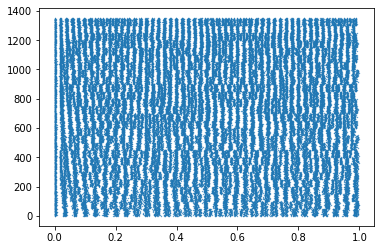

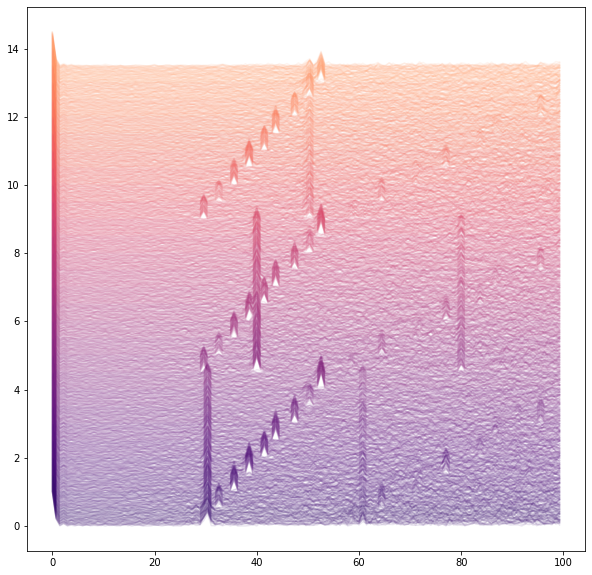

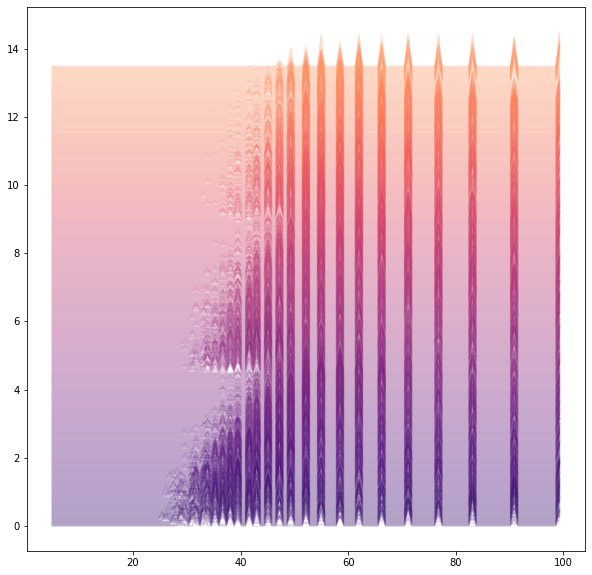

In [4]:

# Turns a dictionary into a class
class Dict2Class(object):
      
    def __init__(self, my_dict):
          
        for key in my_dict:
            setattr(self, key, my_dict[key])
parameters = {'seed': 6, 'sim_time': 1, 'trials_n': 50, 'noise': 100, 'shift': 1, 'batch_size': 1000, 'gpu': False, 'epochs': 100, 'lr_spikes': 0.1, 'lr_dec': 1, 'clock_sim': 1e-3, 'tau_Osc_Irec': 0.001, 'tau_Osc_Ie': 0.001, 'tau_Osc': 0.01, 'neurons_n': 50, 'enc_w_in_mean': 0, 'enc_w_in_std': 1, 'gain_syn': 1, 'gain_syn_rec': 0.1, 'regen_stimuli': True, 'layers_size': [50, 50], 'nni_opt': False, 'tqdm_silence': False, 'figures': 0, 'load_optimal': False, 'early_stop': False, 'sprinkle': 0, 'f1_start': 30, 'f1_end': 57, 'f1_step': 3, 'f2_start': 30, 'f2_end': 57, 'f2_step': 9}
parameters['device'] = 'cpu'
args = Dict2Class(parameters)

freqs1 = np.arange(args.f1_start, args.f1_end, args.f1_step)
freqs2 = np.arange(args.f2_start, args.f2_end, args.f2_step)
in_spikes_m, labels_combined_str = import_dataloaders(freqs1, freqs2, args, parameters,sparse=True,return_datasets=True)
sampling = 1000
print(in_spikes_m.shape)
time = in_spikes_m.shape[0]/sampling
print(time)
rate = 1000
pw = 1*10**-2 #spikewidth for fft
in_spikes_m_dense = in_spikes_m[:,:,0] 
labels_unique = np.unique(labels_combined_str)
colors = plt.colormaps['magma'](np.linspace(0.2,0.8,labels_unique.shape[0]))

times = np.linspace(0,time,int(time*rate))
volts_m = in_spikes_m[:,:,0]
events_v_m = np.where(volts_m.T)
plt.scatter(events_v_m[0]*1/rate,events_v_m[1],s=0.1)
# labels_combined_str = [str(labels_combined[i][0].item()) + ', ' + str(labels_combined[i][1].item()) for i in range(len(labels_combined))]
_,idx = np.unique(labels_combined_str,return_index=True)
idx_sorted = np.sort(idx)
labels_unique = np.array(labels_combined_str)[idx_sorted]
# labels_unique = np.unique(labels_combined_str)
fig1,axis1 = plt.subplots(1,1,figsize=(10,10))
fig2,axis2 = plt.subplots(1,1,figsize=(10,10))
fmax = 100
ffttest_coll = []
isitest_coll = []
isiplot_y = []
isiplot_x = []
print(labels_unique)
for trial in range(volts_m.shape[0]-1,-1,-1):
    datafreqs = np.fft.rfftfreq(volts_m.shape[0],d=1/rate)
    which_trial = np.where(labels_unique == labels_combined_str[trial].item())

    ffttest=np.real(np.fft.rfft(volts_m[trial,:],volts_m.shape[0])).flatten()
    index_fmax = np.where(datafreqs<fmax)[0]
    # ffttest[ffttest< ffttest.max()*0.1] = 0

    ffttest_coll.append(ffttest[index_fmax])
    # print(ffttest)
    
#         ax2.plot(datafreqs[2:],np.abs(ffttest[2:])/np.abs(ffttest[2:]).max()+2*i+0.05*j,c=colors[j],alpha=0.8)
    datafreqs_capped = datafreqs[index_fmax]
    axis1.plot(datafreqs[index_fmax],np.abs(ffttest[index_fmax])/np.abs(ffttest[index_fmax]).max()+0.01*trial,alpha=0.1,color=colors[which_trial[0][0]])
    # axis1.plot(datafreqs[10:index_fmax],np.abs(ffttest[10:index_fmax])/np.abs(ffttest[10:index_fmax]).max()+0.01*trial,alpha=0.3,c='k',linewidth=0.5)
    isis = np.diff(events_v_m[0][events_v_m[1]==trial])
#     print(rate/isis)
    hist = np.histogram(rate/isis,range=(5,fmax),bins=len(datafreqs_capped))
    isitest_coll.append(hist[0])
    # axis2.plot(hist[1][:-1],hist[0]/hist[0].max()+0.01*trial,alpha=0.3,c='k')
    axis2.plot(hist[1][:-1],hist[0]/hist[0].max()+0.01*trial,alpha=0.1,color=colors[which_trial[0][0]])
    hist_plot = np.histogram(rate/isis,range=(5,fmax))
    isiplot_x.append(hist_plot[1])
    isiplot_y.append(hist_plot[0])

# in_spikes_m = spike_train.reshape((times.shape[0],in_spikes_m.shape[1]))

torch.Size([1350, 1000, 50])


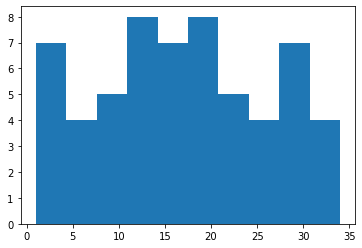

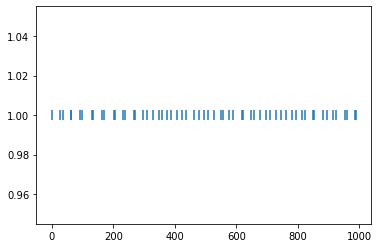

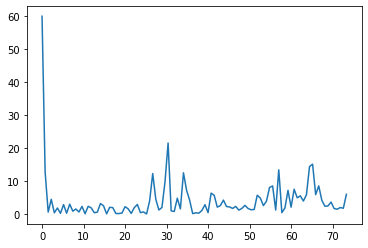

In [5]:
print(in_spikes_m.shape)
events = np.where(volts_m[0,:])
diff = np.diff(events[0])
plt.hist(diff)
plt.figure()
plt.scatter(events[0],np.ones_like(events[0]),s=100,marker='|')
plt.figure()
fft = np.fft.rfft(in_spikes_m[0,:,0])
ffttest=np.real(np.fft.rfft(volts_m[0,:],volts_m.shape[0])).flatten()[:100]
fftfreq = np.fft.rfftfreq(volts_m.shape[0],d=1/rate)[:100]
plt.plot(fftfreq,np.abs(ffttest))

In [6]:
len(isitest_coll)

1350

# PLOT THE RASTER, FFT, IRH AND CLASSIFIER RESULTS

100%|██████████| 1350/1350 [00:22<00:00, 278.88it/s]

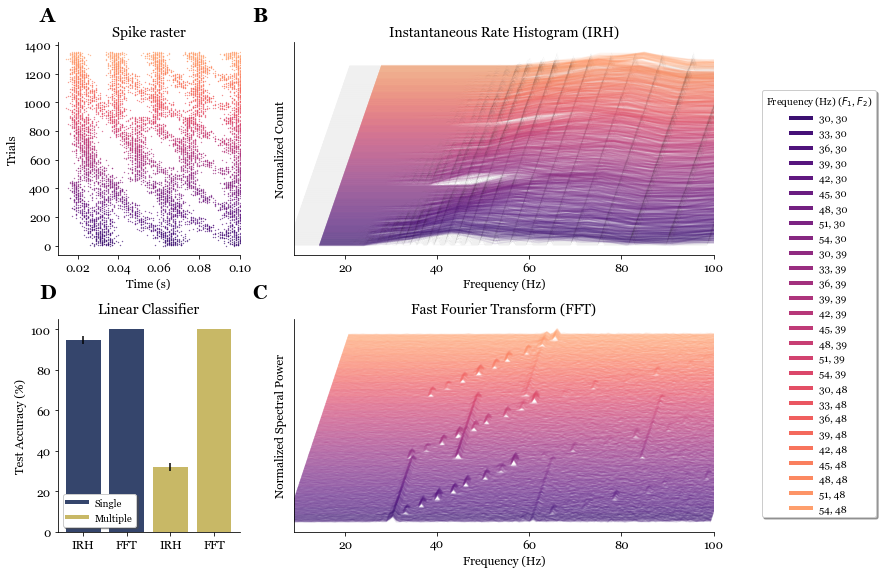

In [11]:
# fig1,axis1 = plt.subplots(figsize=(10,10),ncols=2,nrows=2)
from matplotlib.lines import Line2D
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', family='georgia', size=SMALL_SIZE)
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig1 = plt.figure(figsize=(16,9))
gs = fig1.add_gridspec(2, 4)
axs = []
axs.append(fig1.add_subplot(gs[0, 0]))
axs.append(fig1.add_subplot(gs[0, 1:3]))
axs.append(fig1.add_subplot(gs[1, 0]))
axs.append(fig1.add_subplot(gs[1, 1:3]))#,projection='3d'))
colors = plt.colormaps['magma'](np.linspace(0.2,0.8,labels_unique.shape[0]))
plotting = tqdm(range(0,volts_m.shape[0],1))
shift = 0.01
linewidth = 0.05
# print(labels_unique)
letters = ['\\textbf{A}','\\textbf{B}','\\textbf{D}','\\textbf{C}']
for tr_idx,trial in enumerate(range(volts_m.shape[0]-1,-1,-1)):
    plotting.update()
    which_trial = np.where(labels_unique == labels_combined_str[trial].item())
#     print('labels_unique',labels_unique)
#     print('labels_combined_str[trial]',labels_combined_str[trial])
#     print(which_trial)
    axs[0].scatter(events_v_m[0][events_v_m[1]==trial]*1/rate,events_v_m[1][events_v_m[1]==trial],s=0.1,color=colors[which_trial[0][0]])
    axs[0].set_xlim([0.01,0.1])
#     axs[1].plot(datafreqs_capped,np.abs(ffttest_coll[tr_idx])/np.abs(ffttest_coll[tr_idx]).max()+shift*trial,alpha=1,c=colors[which_trial[0][0]],linewidth=linewidth)
#     axs[3].plot(datafreqs_capped+trial*shift,np.abs(ffttest_coll[tr_idx])/np.abs(ffttest_coll[tr_idx]).max()+shift*trial,alpha=1,c='k',linewidth=linewidth)
    axs[3].plot(datafreqs_capped[10:]+trial*shift,(np.abs(ffttest_coll[tr_idx])/np.abs(ffttest_coll[tr_idx]).max())[10:]+shift*trial,alpha=0.1,color=colors[which_trial[0][0]])
#     axs[3].plot(xs=datafreqs_capped[10:],zs=(np.abs(ffttest_coll[tr_idx])/np.abs(ffttest_coll[tr_idx]).max())[10:],ys=np.ones_like(datafreqs_capped[10:])*trial,alpha=0.9,color=colors[which_trial[0][0]])
    # axs[3].plot(np.abs(isiplot_y[tr_idx])/np.abs(isiplot_y[tr_idx]).max()+shift*trial,alpha=1,c=colors[which_trial[0][0]],linewidth=linewidth)
    axs[1].plot(datafreqs_capped[10:]+trial*shift,(np.abs(isitest_coll[tr_idx])/np.abs(isitest_coll[tr_idx]).max())[10:]+shift*trial,alpha=0.1,color='k',linewidth=0.1)
    axs[1].plot(isiplot_x[tr_idx][1:]+trial*shift,np.abs(isiplot_y[tr_idx])/np.abs(isiplot_y[tr_idx]).max()+shift*trial,alpha=0.1,color=colors[which_trial[0][0]])
    axs[3].set_xlim([9,100])
    axs[1].set_xlim([9,100])

colors_l = plt.colormaps['cividis'](np.linspace(0.2,0.8,2))
# axs[2].plot(acc_isi_tr, label='ISI Training', color=colors_l[0], linewidth=2,linestyle='--')
# axs[2].plot(acc_fft_tr, label='FFT Training', color=colors_l[1], linewidth=2,linestyle='--')
# axs[2].plot(np.array(acc_isi_te)*100, label='ISI', color=colors_l[0], linewidth=2)
# axs[2].plot(np.array(acc_fft_te)*100, label='FFT', color=colors_l[1], linewidth=2)
axs[2].bar([0,1,2,3],[np.mean(np.array(isi_s)[:,-1])*100,np.mean(np.array(fft_s)[:,-1])*100,np.mean(np.array(isi_m)[:,-1])*100,np.mean(np.array(fft_m)[:,-1])*100],yerr=[np.std(np.array(isi_s)[:,-1]*100),np.std(np.array(fft_s)[:,-1]*100),np.std(np.array(isi_m)[:,-1]*100),np.std(np.array(fft_m)[:,-1]*100)], color=[colors_l[0],colors_l[0],colors_l[1],colors_l[1]])
custom_lines = []
labels = []
for counter, label in enumerate(['Single','Multiple']):
    labels.append(label)
    custom_lines.append(Line2D([0], [0], color=colors_l[counter], lw=4))
axs[2].legend(custom_lines,labels,ncol=1,loc='lower left',fancybox=True, shadow=True)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Trials')
axs[1].set_yticks([])
axs[3].set_yticks([])
axs[0].set_title('Spike raster')
axs[1].set_xlabel('Frequency (Hz)')
axs[3].set_ylabel('Normalized Spectral Power')
axs[3].set_title('Fast Fourier Transform (FFT)')
axs[3].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Normalized Count')
axs[1].set_title('Instantaneous Rate Histogram (IRH)')
# axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Test Accuracy (%)')
axs[2].set_title('Linear Classifier')
axs[2].set_xticks([0,1,2,3])
axs[2].set_xticklabels(['IRH','FFT','IRH','FFT'])
# axs[3].view_init(elev=50., azim=-100)
letters = ['A','B','D','C']
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.patch.set_visible(False)
    ax.grid(False)
    # ax.text(-0.0, 1.1, letters.pop(0), transform=ax.transAxes, 
    #         size=20, weight='bold')

custom_lines = []
freqs = np.arange(30, 57, 3)
labels_unique_freqs = []
counter = 0
for f2 in freqs2:
    for f1 in freqs1:
        labels_unique_freqs.append(str(f1) + ', ' + str(f2))
        custom_lines.append(Line2D([0], [0], color=colors[counter], lw=4))
        counter += 1
axs[1].legend(custom_lines, labels_unique_freqs,loc='upper right',ncol=1, fancybox=True, shadow=True,bbox_to_anchor=(1.4, 0.8),title='Frequency (Hz) ($F_1$, $F_2$)')
for ax in axs:
    ax.text(-0.1, 1.1, letters.pop(0), transform=ax.transAxes, 
            size=20, weight='bold')
# fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3,hspace=0.3)
fig1.savefig('FigS1.pdf',dpi=300,bbox_inches='tight')
fig1.savefig('FigS1.png',dpi=300,bbox_inches='tight')

    # axis1[0,1].plot(datafreqs_capped,np.abs(ffttest_coll[trial])+0.01*trial,alpha=0.3,c='w',linewidth=0.5)
    # axis1[0,1].fill_between(datafreqs_capped,np.abs(ffttest_coll[trial])+0.01*trial,alpha=0.1,color=colors[which_trial[0][0]])

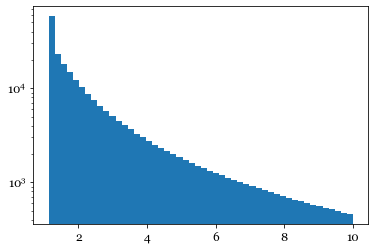

In [8]:



T1 = 1
T2 = 0.78347
T3 = 0.238347

t1 = np.arange(0,100000, T1)
t2 = np.arange(0,100000, T2)

t = np.concatenate((t1,t2))

t = np.sort(t)
isi = t[1:] - t[:-1]

plt.hist(1/(isi+1e-1), bins = 50)

# set y scale log
plt.yscale('log')


In [9]:
# now do for a list of general T values
T = np.arange(0.1, 1, 0.1)  
times = []
for t in T:
    t = np.arange(0,10000, t)
    t = np.sort(t)
    isi.append(t[1:] - t[:-1])


AttributeError: 'numpy.ndarray' object has no attribute 'append'